In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, TimeDistributed
from model import Model

tf.__version__

'2.3.0'

In [2]:
def generateArma(
    n,
    obsCoef,
    noiseCoef,
    noiseGenFunc,
    noiseGenParams,
    obsFunc = None,
    noiseFunc = None
):

    p = len(obsCoef)
    q = len(noiseCoef)    
    
    x = np.zeros(n)
    eps = np.zeros(n)

    for t in range(n):

        obsVal = 0
        for i in range(min(t, p)):
            obsVal += obsCoef[i] * x[t - i - 1]
        
        if obsFunc is not None:
            obsVal = obsFunc(obsVal)
        x[t] += obsVal
        
        noiseVal = 0
        for j in range(min(t, q)):
            noiseVal += noiseCoef[j] * eps[t - j - 1]

        if noiseFunc is not None:
            noiseVal = noiseFunc(noiseVal)
        x[t] += noiseVal

        eps[t] = noiseGenFunc(*noiseGenParams)
        x[t] += eps[t]

    return x

In [3]:
n = 100
P = 50
Q = 50

In [4]:
obsCoef = np.concatenate([
    np.random.uniform(-0.1, 0, size = P // 2),
    np.random.uniform(0, 0.1, size = P // 2)
])

noiseCoef = np.concatenate([
    np.random.uniform(-0.01, 0, size = Q // 2),
    np.random.uniform(0, 0.01, size = Q // 2)
])

noiseGenFunc = np.random.lognormal
noiseGenParams = (1.0, 1.0)

In [5]:
trainSeq = generateArma(n, obsCoef, noiseCoef, noiseGenFunc, noiseGenParams)

Plotting Sequence


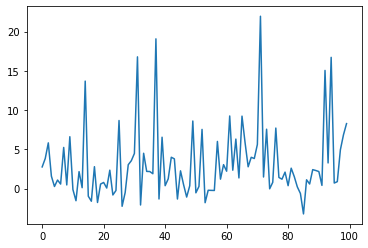

In [6]:
print('Plotting Sequence')
plt.plot(trainSeq)
plt.show()

In [7]:
x = trainSeq[:n-1, np.newaxis]
y = trainSeq[1:, np.newaxis]

In [8]:
model = Model(
    memorySize = 5,
    windowSize = 5,
    threshold = 40,
    inputDimension = 1,
    hiddenStateSize = 10,
    extremeValueIndex = 2.1,
    optimizer = tf.keras.optimizers.Adam(),
    extremeLossWeight = 1.0
)

In [9]:
model.train(x, y, 20)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

